In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Extra or EDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


#warning
from warnings import filterwarnings
filterwarnings("ignore")

In [65]:
data_frame = pd.read_csv('heartdisease.csv')

In [66]:
data_frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Density'>

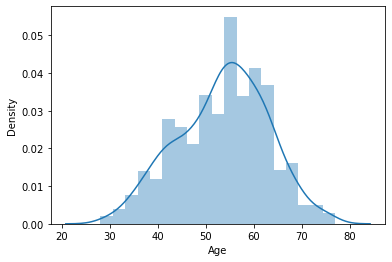

In [5]:
sns.distplot(data_frame['Age'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

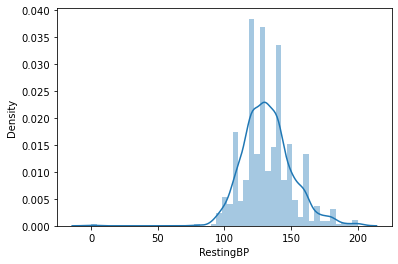

In [6]:
sns.distplot(data_frame['RestingBP'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

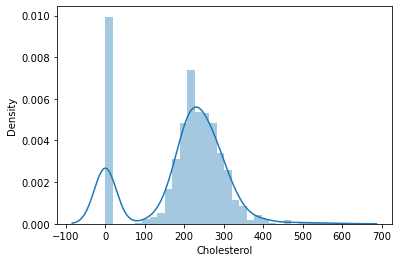

In [7]:
sns.distplot(data_frame['Cholesterol'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

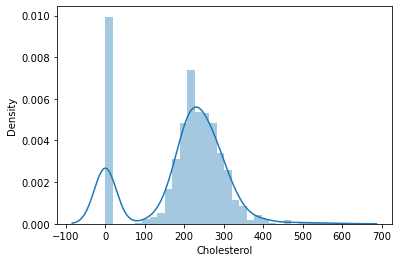

In [8]:
sns.distplot(data_frame['Cholesterol'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

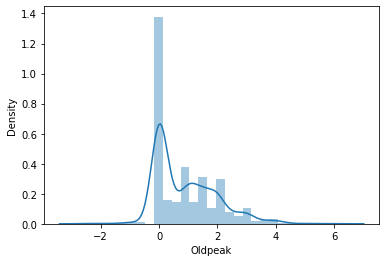

In [9]:
sns.distplot(data_frame['Oldpeak'])

In [10]:
data_frame['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Sex', ylabel='count'>

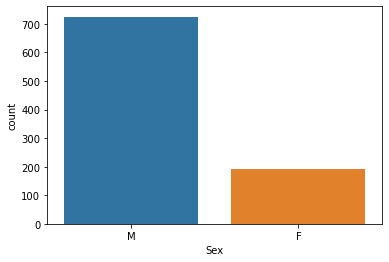

In [11]:
sns.countplot(data_frame['Sex'])

In [12]:
data_frame['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

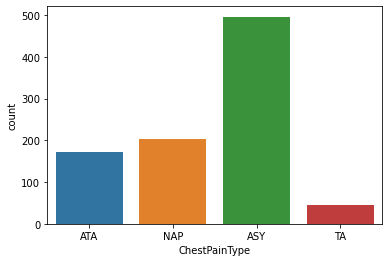

In [13]:
sns.countplot(data_frame['ChestPainType'])

In [14]:
data_frame['RestingECG'].value_counts()


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

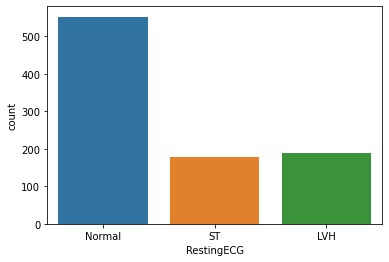

In [15]:
sns.countplot(data_frame['RestingECG'])

In [16]:
data_frame['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

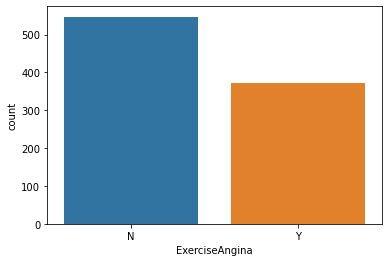

In [17]:
sns.countplot(data_frame['ExerciseAngina'])


In [18]:
data_frame['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

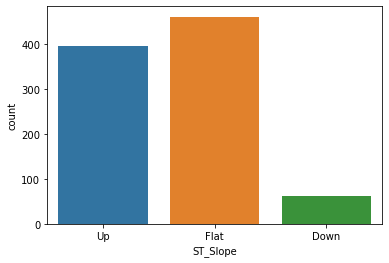

In [19]:
sns.countplot(data_frame['ST_Slope'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Sex'] = le.fit_transform(data_frame['Sex'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ChestPainType'] = le.fit_transform(data_frame['ChestPainType'])

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ExerciseAngina'] = le.fit_transform(data_frame['ExerciseAngina'])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['RestingECG'] = le.fit_transform(data_frame['RestingECG'])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ST_Slope'] = le.fit_transform(data_frame['ST_Slope'])

In [25]:
data_frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [26]:
corr=data_frame.corr()

<IPython.core.display.Javascript object>

<AxesSubplot:>

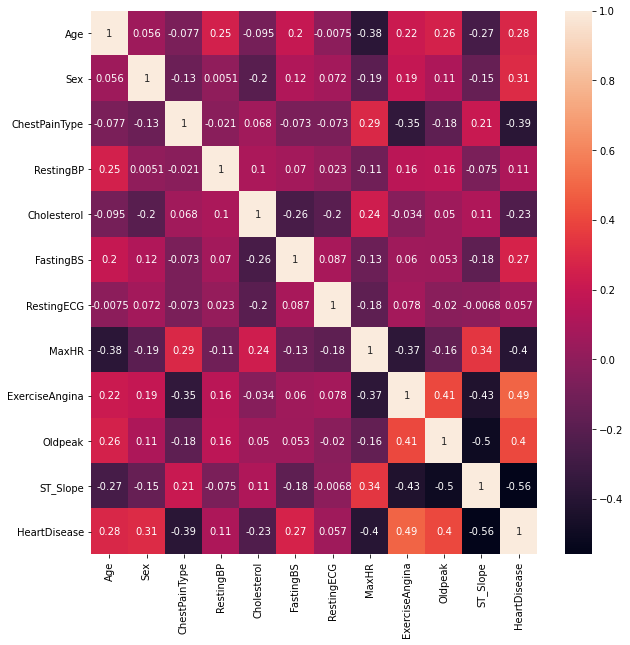

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [28]:
X=data_frame.drop(['HeartDisease'],axis=1)
Y=data_frame['HeartDisease']

In [29]:
std = StandardScaler()
X_ = std.fit_transform(X)

In [30]:
X,Y

(     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
 0     40    1              1        140          289          0           1   
 1     49    0              2        160          180          0           1   
 2     37    1              1        130          283          0           2   
 3     48    0              0        138          214          0           1   
 4     54    1              2        150          195          0           1   
 ..   ...  ...            ...        ...          ...        ...         ...   
 913   45    1              3        110          264          0           1   
 914   68    1              0        144          193          1           1   
 915   57    1              0        130          131          0           1   
 916   57    0              1        130          236          0           0   
 917   38    1              2        138          175          0           1   
 
      MaxHR  ExerciseAngina  Oldpeak  

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [32]:
X_train.shape,X_test.shape,X.shape

((734, 11), (184, 11), (918, 11))

In [33]:
def model_runner(model, X_train, Y_train, X_test, Y_test):
    model_r = model
    model_r.fit(X_train, Y_train)
    predicted_ = model_r.predict(X_test)
    print(classification_report(predicted_, Y_test))

In [34]:
model_lg=model_runner(LogisticRegression(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        86
           1       0.82      0.90      0.86        98

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [35]:
model_dtc=model_runner(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        89
           1       0.78      0.87      0.82        95

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [36]:
model_rfc=model_runner(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        80
           1       0.88      0.90      0.89       104

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [37]:
model_Knn=model_runner(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        88
           1       0.69      0.77      0.73        96

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.70      0.70      0.70       184



In [38]:
model_bg=model_runner(BaggingClassifier(base_estimator=RandomForestClassifier()), 
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.89      0.92      0.90       103

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [39]:
estimators = [('lg', LogisticRegression()), 
              ('knn', KNeighborsClassifier()), 
              ('Dt', DecisionTreeClassifier()),
              ('rf', RandomForestClassifier()), 
              ('bg', BaggingClassifier(base_estimator=RandomForestClassifier()))]

model_runner(VotingClassifier(estimators=estimators, voting='hard'),
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        83
           1       0.88      0.93      0.90       101

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [40]:
model_runner(VotingClassifier(estimators=estimators, voting='soft'),
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        86
           1       0.84      0.92      0.88        98

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [41]:
rf_model=RandomForestClassifier()


In [42]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
pred_rf = rf_model.predict(X_test)

In [44]:
pred_rf

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [45]:
clf=classification_report(pred_rf,Y_test)
print(clf)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        83
           1       0.87      0.92      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [46]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

<AxesSubplot:>

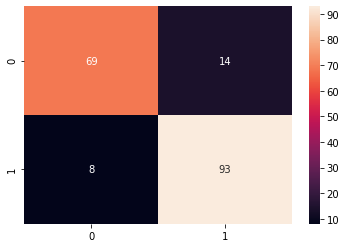

In [47]:
cm= confusion_matrix(pred_rf,Y_test)
sns.heatmap(cm,annot=True)

In [48]:
#we have to predict the new data by using  from  test data prediction 
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2


In [49]:
new_data=rf_model.predict([[50,1,2,120,100,1,1,150,0,1.2,2]])

In [50]:
new_data

array([1], dtype=int64)

In [51]:
rf_model_train=RandomForestClassifier()

In [52]:
rf_model_train.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
pred_rf_train = rf_model_train.predict(X_train)

In [54]:
pred_rf_train

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [55]:
clf=classification_report(pred_rf_train,Y_train)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



<IPython.core.display.Javascript object>

<AxesSubplot:>

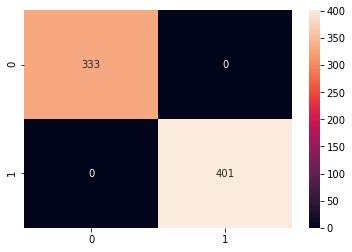

In [60]:
cm= confusion_matrix(pred_rf_train,Y_train)
sns.heatmap(cm,annot=True,fmt='1')

In [57]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [58]:
new_data=rf_model.predict([[55,0,2,120,153,0,1,125,1,1.0,1]])
for i in new_data:
    if i==0:  
        print('This person does not have heart disease')
    else:
        print('This person have heart diseased')

This person have heart diseased


# THANK YOU